# **Predicting House Prices: Exploratory Data Analysis and Linear Regression Modeling**

# **Importing the required libraries**

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score  

import warnings
warnings.filterwarnings("ignore")

# **Importing our dataset**

In [2]:
data = pd.read_csv('./data/Housing.csv')  
data.head()    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:

data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# **Understanding our data**

In [4]:

print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (545, 13)


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#### **Columns or Features Description**

- 'price': The price of the house (target variable).
- 'area': The area or size of the house in square feet.
- 'bedrooms': The number of bedrooms in the house.
- 'bathrooms': The number of bathrooms in the house.
- 'stories': The number of stories or floors in the house.
- 'mainroad': Categorical variable indicating whether the house is located near the main road or not.
- 'guestroom': Categorical variable indicating whether the house has a guest room or not.
- 'basement': Categorical variable indicating whether the house has a basement or not.
- 'hotwaterheating': Categorical variable indicating whether the house has hot water heating or not.
- 'airconditioning': Categorical variable indicating whether the house has air conditioning or not.
- 'parking': The number of parking spaces available with the house.
- 'prefarea': Categorical variable indicating whether the house is in a preferred area or not.
- 'furnishingstatus': The furnishing status of the house (e.g., unfurnished, semi-furnished, fully furnished).

In [7]:

data.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


# **Checking NULL Values**

In [8]:

data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

The inference we can make after checking for null values and finding that there are no null values in any of the columns is that the dataset is complete in terms of missing values. 

Having no null values is beneficial because it allows us to work with the entire dataset without the need for imputation or handling missing data. We can proceed with further data analysis, visualization, and modeling.

# **Performing EDA**


### **1. Handling Binary Categorical Variables (Yes/No) Categories**

In [9]:

categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [10]:
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [11]:
def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.
    
    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.
    
    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

In [12]:

data[categorical_col] = data[categorical_col].apply(binary_map)


data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [13]:

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### **2. Handling Categorical data with Dummy Variable**

In [14]:

dummy_col = pd.get_dummies(data['furnishingstatus'])


dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [15]:

dummy_col = pd.get_dummies(data['furnishingstatus'], drop_first=True)


dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [16]:

data = pd.concat([data, dummy_col], axis=1)


data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [17]:

data.drop(['furnishingstatus'], axis=1, inplace=True)


data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


# **Splitting data into Training and Testing data**

In [18]:

data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [19]:
np.random.seed(0)


df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [20]:

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,False,True
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,False,False
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,False,False
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,False,True


In [21]:

df_train.shape

(381, 14)

In [22]:

df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,True,False
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,True,False
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,True,False


In [23]:

df_test.shape

(164, 14)

# **Scaling Training Data: MinMaxScaler**

In [24]:

scaler = MinMaxScaler()

In [25]:

col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [26]:

df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

# **Training the model**

In [27]:

y_train = df_train.pop('price')


x_train = df_train

In [28]:

linear_regression = LinearRegression()

In [29]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [30]:

coefficients = linear_regression.coef_


print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


In [31]:

score = linear_regression.score(x_train, y_train)


print(score)

0.6814893088451202


# **Scaling Test Data: MinMaxScaler**

In [32]:

col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [33]:

df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])

# **Testing our model**

In [34]:

y_test = df_test.pop('price')


x_test = df_test

In [35]:

prediction = linear_regression.predict(x_test)

### **Checking R squared value**

In [36]:

r2 = r2_score(y_test, prediction)

# **Comparing the actual and predicted values**

In [37]:

y_test.shape

y_test_matrix = y_test.values.reshape(-1, 1)

In [38]:

data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

In [39]:
# Display the first 10 rows of the DataFrame
data_frame.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


### **Plotting the Graph**

Text(0, 0.5, 'Predicted')

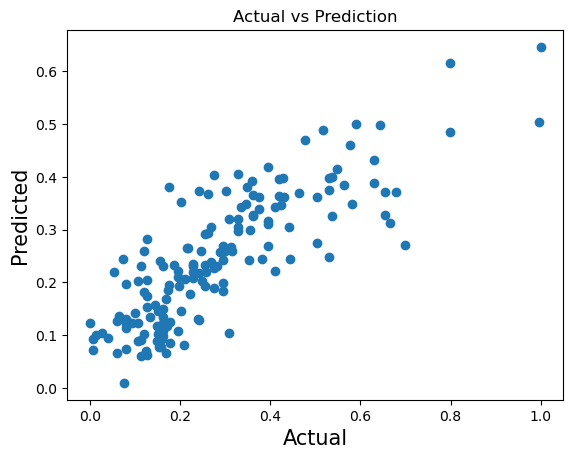

In [40]:
# Create a new figure
fig = plt.figure()

# Scatter plot of actual versus predicted values
plt.scatter(y_test, prediction)

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)

In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.014451840099238325


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)


In [43]:
print(" Mean Squared Error:", knn_mse)
print(" R-squared:", knn_r2)

 Mean Squared Error: 0.016705801043690162
 R-squared: 0.5371030870375235


In [44]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)

In [45]:
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

In [46]:
print(" Mean Squared Error:", dt_mse)
print(" R-squared:", dt_r2)

 Mean Squared Error: 0.026799030018492542
 R-squared: 0.25743229950446356


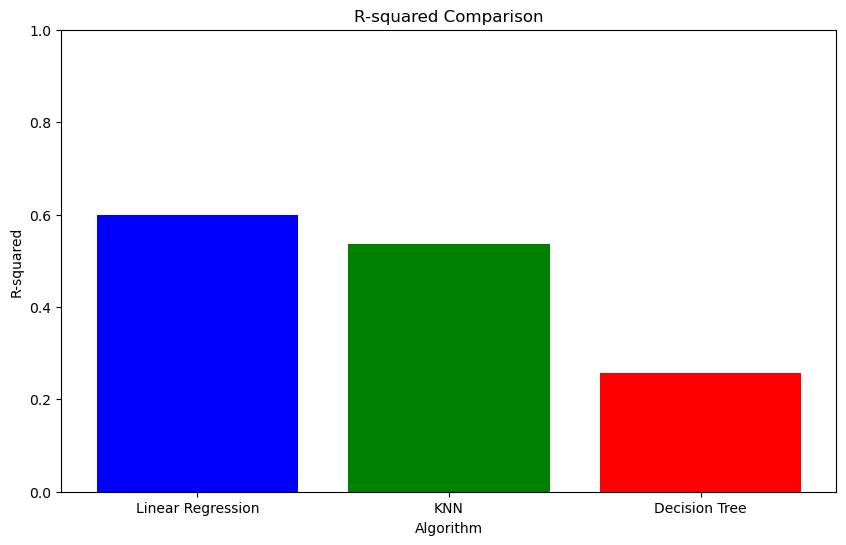

In [47]:
import matplotlib.pyplot as plt
algorithms = ['Linear Regression', 'KNN', 'Decision Tree']
r2_scores = [r2, knn_r2, dt_r2]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, r2_scores, color=['blue', 'green', 'red'])
plt.title('R-squared Comparison')
plt.xlabel('Algorithm')
plt.ylabel('R-squared')
plt.ylim(0, 1)  
plt.show()

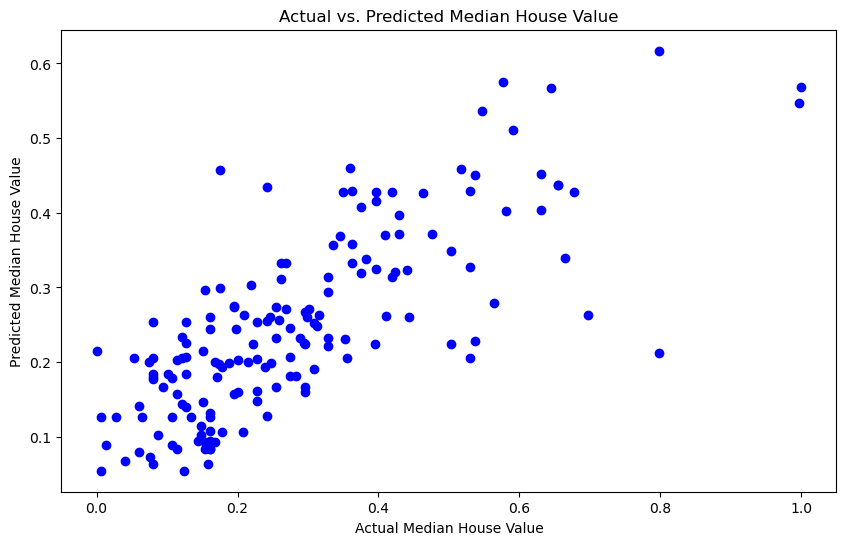

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

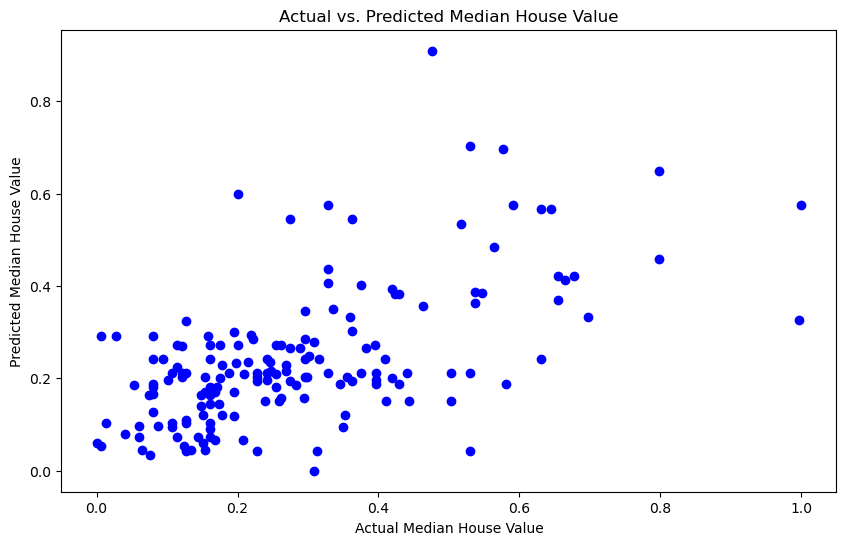

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, color='blue')
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3) 
plt.show()